## Basic statistics in Python

In [2]:
x = [1,2,3,4,5,6,7,8,9,10]

A sample of data represented by the list "x" above, can be evaluated with some key metrics: mean, median, standard deviation and variance. There are other kinds of statistics that can be used to describe the data. The term ***statistic*** is used for samples of data, while the term ***parameter*** is used for populations, which can be described by functions.

### Descriptive Statistics

Descriptive statistics is all about describing data sets like "x" above. We can do statistics inside the Jupyter notebook by writing code within cells and evaluating them. 
* Code written in cells above can be evaluated and the results can be used by cells below.
* If a cell doesn't return a result, first check if cells above have been run already
* The code isn't compiled until run time (Python is an interpreted language)

In [3]:
import numpy as np

import matplotlib.pyplot as plt

np.mean(x)


5.5

In the above cell, we've calculated the arithmetic mean (mean) of the sample x. This is done within Python easily by using the "numpy" library. When we import a library for use in Python, we can give it an alias. By convention, the following aliases are used for the following libraries (which are commonly used in Python for data analysis):

* numpy - "np"
* scipy - "sp"
* matplotlib.pyplot - "plt"
* pandas - "pd"

Of course, you can give any alias you want but following the convention helps compare code from anywhere.

Some statistics you can compute for x: mean, standard deviation, variance.

Mean: $$\bar x = \frac{\sum X_i}{n}$$

Standard Deviation: $$s = \sqrt{ \frac{\sum (X_i - \bar X)^2}{n-1}}$$

Note 1: Standard deviation is the square root of variance.

Note 2: We use $n-1$ in the formula for standard deviation because of Bessel's correction. Please refer: https://en.wikipedia.org/wiki/Bessel's_correction 

In [4]:
print "Standard deviation of x: ", np.std(x)
print "Variance of x: ", np.var(x)

Standard deviation of x:  2.87228132327
Variance of x:  8.25


We can generate data within Jupyter and analyze and visualize it. We can also pull data in from excel spreadsheets and CSV files.

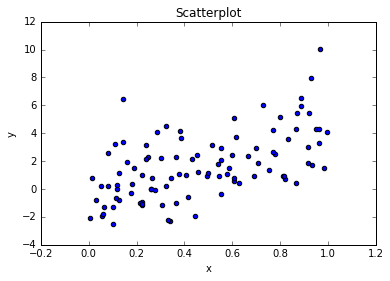

In [5]:
x = np.random.random(100) #generating 100 points of random float data

y = x**2 + 3*x + np.random.normal(0,2,100)  #calculating y as a function of x

%matplotlib inline
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot")
plt.show()

We can now write x and y to a file. For this, the pandas library provides a very good interface (although this can also be done within Python). Pandas is a library that uses data frames as a way to organize tabular data. It comes with powerful functions to read, write and manipulate tables. 

In [6]:
import pandas as pd

#preparing a dataframe within pandas

dframe = {"x":x,"y":y} #Dictionary with key-value pairs. Keys in this case are row headings. Values are x and y data

df = pd.DataFrame(dframe) #Dataframes can be constructed within pandas by passing a dictionary of list values.

print df.head() #The "head()" method inside data frames allows us to see the first few values in a data set

df.to_csv("data.csv") #Dataframes can be written to csv or other formats. Stores in working directory by default.

          x         y
0  0.387499  3.649965
1  0.224507 -1.154344
2  0.700269  2.956766
3  0.960653  3.310035
4  0.181661  0.369305


We've seen how data can be generated and stored in data frames. We've also seen how data can be saved to CSV files in pandas. Now we'll see how to pull data from the same file, assign the data to variables, and do column statistics. We'll also see how simple plots can be done from within Pandas itself.

In [7]:
#Pulling data from a CSV file

dataset = pd.read_csv("data.csv", ) #Read data from data.csv in your working directory

In [8]:
dataset.head()

,Unnamed: 0,x,y
0,0,0.387499,3.649965
1,1,0.224507,-1.154344
2,2,0.700269,2.956766
3,3,0.960653,3.310035
4,4,0.181661,0.369305


Observe how the first column in "data.csv" has been taken in as a column with "Unnamed: 0" as name. This column doesn't contain any data, only indices. We can therefore delete it.

In [9]:
del dataset["Unnamed: 0"]

In [10]:
dataset.head()

,x,y
0,0.387499,3.649965
1,0.224507,-1.154344
2,0.700269,2.956766
3,0.960653,3.310035
4,0.181661,0.369305


Observe how the dataset above no longer has the garbage column. This is one way in which we can remove columns of data from pandas data frames. Before removing data, it is sometimes useful to check by printing the data (if the data set is small), or summarising it.

We can summarize data easily by using the describe() method within dataframes.

In [11]:
dataset.describe()

,x,y
count,100.000000,100.000000
mean,0.468093,1.690836
std,0.298079,2.381817
min,0.004117,-2.485406
25%,0.221471,0.152267
50%,0.422053,1.300536
75%,0.735260,3.181988
max,0.994373,10.006481


Here, you can see the key sample statistics calculated for each data column - mean, standard deviation, min and max values and the interquartile ranges can all be seen.

Note: A quartile consists of multiples of the 25% of the range of the data. Therefore, the 1st quartile of $x$ is the subset of all data between $min(x)$ and 25% of range. The distance between the 1st quartile and 3rd quartile is called Inter Quartile range ($IQR$). The median $\tilde X$ is essentially the third quartile. 

Interquartile range: $$ Q_3 - Q_1 = IQR$$
Median : $$ Q_2 = \tilde X$$

We can understand quartiles using box plots, which are a simple visualization tool. Pandas connects to Matplotlib to implement graphs.

### Simple Plots in Python

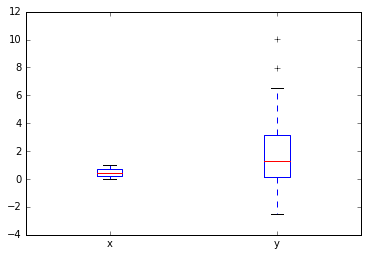

In [12]:
import matplotlib.pyplot as plt #importing matplotlib
%matplotlib inline

dataset.plot(kind = "box") #using built in plot function for each data frame object
plt.show()

Observe how the data in sets $x$ and $y$ have been represented in this boxplot. The height of the box is an indication of how spread out the data in that set is. Some things to observe about the box plot:

* A shorter box indicates a smaller variance
* The red line here indicates the median. 50% of the points in the data set fall below this line
* The "whiskers" which extend outside the box are calculated as $1.5 \times IQR$, measured from the median line.
* Sometimes, points can lie outside the box and whiskers. These are indicated by special symbols and are called "outliers"
    * Outliers can sometimes indicate an unusual (or a novel) result in a test, or in a process or system.
    * There are sophisticated statistical tests used for detecting outliers analytically
    * Graphically, box plots can be a powerful way to detect outliers in a univariate data set.

Note: A univariate dataset is a data set where the result is dependent on only one variable. Sometimes, we can have a single result dependent on multiple inputs. In such situations, we have to consider Euclidean distance to find outliers.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c0ac0b190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2c0ab6c1d0>], dtype=object)

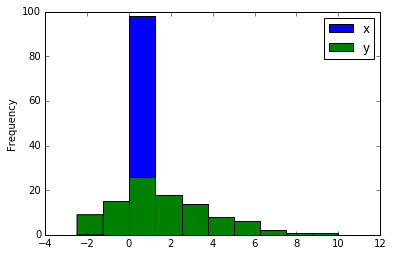

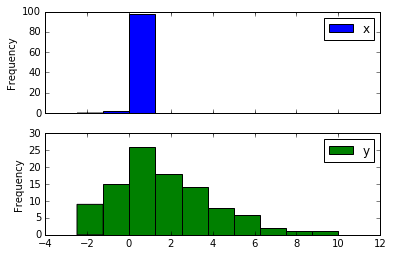

In [13]:
dataset.plot(kind = "hist")
dataset.plot(kind = "hist", subplots=True)

We can see three plots above, and all of them are histograms.
* The first is a combined histogram, which shows both the $x$ column and $y$ column values as overlapping histograms.
* The second command implemented a two-panel histgram, with one panel each for $x$ and for $y$

Things to remember about histograms:
* They tell us the approximate central tendency or shape of the data set or variable
* The range of the histogram can give us an idea of how spread out the data is
* We can evaluate kurtosis and skewness of data sets by studying histograms.

**Kurtosis**: A data set with *higher kurtosis* has a greater concentration of values at its centre, and the distribution looks more "peaked". A data set is said to have *lower kurtosis* if the data is relatively flat. The standard normal distribution is taken as a standard for kurtosis with a value of 1.0.

**Skewness**: A data set is said to be *right skewed* if there are extreme points on the upper side of the data set. Similarly, it is *left skewed* if it has extreme values on the lower side of the data set.

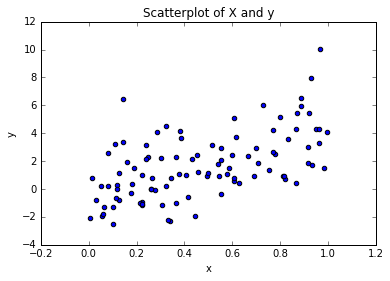

In [14]:
dataset.plot(x = "x", y = "y", kind = "scatter", title = "Scatterplot of X and y")

We can explore the relationship between two variables inside a data frame using the scatter plot. We can choose any two variables as "x" and "y" in the function (as shown above) and can construct a simple scatter plot of the data.

### Correlation and Regression Analysis

We can perform simple correlation studies and simple linear regression using Python as below.


(100,) (100,)


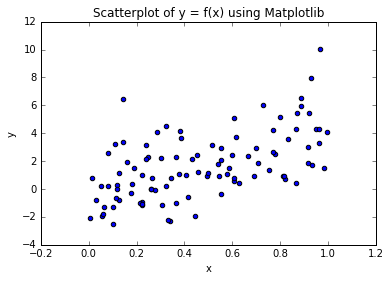

In [27]:
x = dataset['x']
y = dataset['y']
print np.shape(x), np.shape(y)
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of y = f(x) using Matplotlib") #This plot can be constructed in Pandas also, as seen above

In [31]:
R, corrpval = stats.pearsonr(x,y) #Scipy has a built in function to calculate correlation coefficient. 

print " R value for x and y: ", R
print " p-value for correlation hypothesis: ", corrpval

 R value for x and y:  0.57335553334
 p-value for correlation hypothesis:  4.52989319059e-10


Using the R value, we can understand that there is a moderate positive correlation between x and y.

Typical guidelines:
* R varying from -1 to -0.7 : Strong negative correlation
* R varying from -0.7 to -0.3: Moderate negative correlation
* R varying from -0.3 to +0.3: Weak correlation (positive or negative)
* R varying from 0.3 to 0.7: Moderate positive correlation
* R varying from 0.7 to 1.0: Strong positive correlation

We've established that there is a moderate positive correlation in the data between variables x and y. We can use this to begin to build our regression hypothesis.

### Simple Linear Regression using Scipy's Stats module

In [32]:
import scipy.stats as stats #conventional import or scipy's stats module (very extensive functionality)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print "Slope: ", slope, "Intercept: ", intercept, "R: ", r_value, "p-val: ", p_value

print "The equation for the line of best fit is %f x + %f" %(slope, intercept)



Slope:  4.58142533358 Intercept:  -0.453696319001 R:  0.57335553334 p-val:  4.52989319059e-10
The equation for the line of best fit is 4.581425 x + -0.453696


* The $R^2$ value for the data above is an indicator of goodness of fit. R^2 in this case is $0.573^2 = 0.328329$
* There are methods to evaluate the goodness of fit, by using cross validation approaches. We will see these shortly.
* In the above code, observe how a tuple was produced by the stats.linregress() function. This tuple could be directly passed by tuple assignment to the slope, intercept, r and p value variables.

Note: By default, the method implemented by scipy.stats.linregress() computes OLS (Ordinary Least Squares) regression. The OLS regression is said to be the Best Linear Unbiased Estimator (BLUE), as per the Gauss-Markov theorem. https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem 

In [17]:
import datetime as dt

t = dt.datetime.now()
print t
print "Year: ",t.year
print "Month: ", t.month
print "Day: ",t.day
print "Hour: ", t.hour
print "Minute: ", t.minute
print "Second: ",t.second
print "Microsecond: ",t.microsecond

2016-04-07 12:24:34.084426
Year:  2016
Month:  4
Day:  7
Hour:  12
Minute:  24
Second:  34
Microsecond:  84426


The "datetime" library in Python allows handling of the date and time. In the above example, we can see how the datetime function "now" is implemented.

In [18]:
ts = []
import random

for x in range(100):
    t = dt.datetime.now()
    t = t.microsecond ##separating out and recording the microsecond at which the data was generated
    x = random.random()
    ts.append([t,x])

tsdata = pd.DataFrame(ts, columns=["time", "data"])
tsdata.to_csv("timeseriesdata.csv")

Based on data generated from the time series module, we have created time stamps for some process data and stored it in a data frame. We have then extracted this to a file. We can now perform simple time series analysis on this data after importing it.

     time      data
0  156669  0.229613
1  156700  0.050181
2  156705  0.191028
3  156708  0.893278
4  156711  0.930735


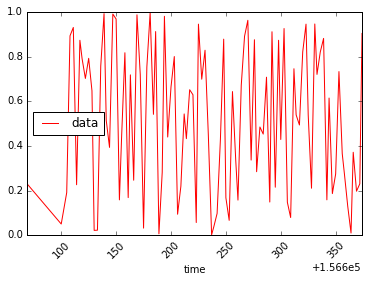

In [19]:
tsd = pd.read_csv("timeseriesdata.csv") #Reading data from the CSV file with time series data

del tsd["Unnamed: 0"]

print tsd.head()

tsd.plot(x = "time", y = "data", kind="line", rot=45, c="r")

We've seen date time handling, and how to plot simple run charts. Python and pandas can be used to do more complex plots, regression fits, and forecasts.